<a href="https://colab.research.google.com/github/runnily/making-a-neural-network-layer-by-layer/blob/main/forward_thinking_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward thinking VS Backpropgate

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!ls

data				LICENSE  MNIST	 README.md
forward_thinking_results.ipynb	main.py  models  utils


# Analysing the CIFAR-10 dataset using a basic net we have built.

This section is comparing the performance using different approachs: Forward thinking and backpropgation. 

The forward thinking algorthium was trained on 2 epochs for every layer

The backpropgation was trained for 40 epochs

In [12]:
ft_cifar_10 = pd.read_csv("utils/recorded-accuracy/ft-cifar-10.csv")
ft_cifar_10.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,9.917394,2.171468,0.482900,0.5662
1,1,19.993038,1.123868,0.613403,0.6002
2,0,43.772735,1.295800,0.541169,0.6252
3,1,67.574946,0.944763,0.672594,0.6699
4,0,90.841390,1.184428,0.584283,0.6648


In [15]:
bp_cifar_10 = pd.read_csv("utils/recorded-accuracy/bp-cifar-10.csv")
bp_cifar_10_ = bp_cifar_10[bp_cifar_10['time_elapsed'] < 350]
bp_cifar_10_.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,83.796484,1.885492,0.310634,0.4751
1,1,167.680289,1.312672,0.527881,0.6001
2,2,251.545602,1.013897,0.645165,0.6727
3,3,335.088109,0.813240,0.716536,0.7245


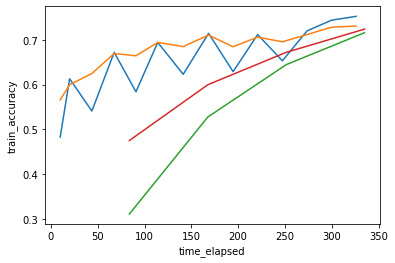

In [16]:
fig, ax = plt.subplots()
sns.lineplot(x="time_elapsed", y="train_accuracy", data=ft_cifar_10, ax=ax)
sns.lineplot(x="time_elapsed", y="test_accuracy", data=ft_cifar_10, ax=ax)
sns.lineplot(x="time_elapsed", y="train_accuracy", data=bp_cifar_10_, ax=ax)
sns.lineplot(x="time_elapsed", y="test_accuracy", data=bp_cifar_10_, ax=ax)

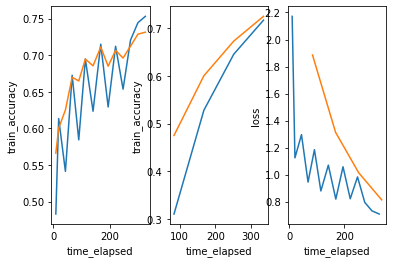

In [21]:
fig, axs = plt.subplots(ncols=3)
sns.lineplot(x="time_elapsed", y="train_accuracy", data=ft_cifar_10, ax=axs[0])
sns.lineplot(x="time_elapsed", y="test_accuracy", data=ft_cifar_10, ax=axs[0])
sns.lineplot(x="time_elapsed", y="train_accuracy", data=bp_cifar_10_, ax=axs[1])
sns.lineplot(x="time_elapsed", y="test_accuracy", data=bp_cifar_10_, ax=axs[1])
sns.lineplot(x="time_elapsed", y="loss", data=ft_cifar_10, ax=axs[2])
sns.lineplot(x="time_elapsed", y="loss", data=bp_cifar_10_, ax=axs[2])

# Analysing the SVHN dataset using a basic net we have built.

The SVHN was training using forward network with 2 epochs for each new layer added

In [4]:
ft_svhn = pd.read_csv("utils/recorded-accuracy/ft-svhn.csv")
ft_svhn.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,15.093286,1.622261,0.622996,0.751383
1,1,29.908403,0.696424,0.798772,0.761716
2,0,64.826485,0.714271,0.787497,0.811232
3,1,99.754294,0.490207,0.858685,0.827174
4,0,133.874856,0.644859,0.808713,0.835395


In [8]:
bp_svhn = pd.read_csv("utils/recorded-accuracy/bp-svhn.csv")
bp_svhn_ = bp_svhn[bp_svhn['time_elapsed'] < 500]
bp_svhn_.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,122.590688,2.234383,0.189408,0.236747
1,1,245.495703,0.712050,0.777233,0.880263
2,2,368.455164,0.342173,0.900341,0.908036
3,3,491.414961,0.258944,0.925758,0.912531


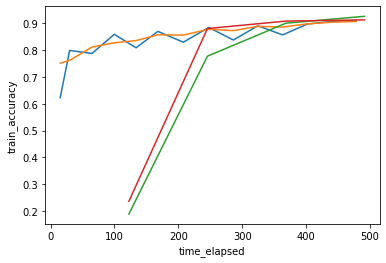

In [9]:
fig, ax = plt.subplots()
sns.lineplot(x="time_elapsed", y="train_accuracy", data=ft_svhn, ax=ax)
sns.lineplot(x="time_elapsed", y="test_accuracy", data=ft_svhn, ax=ax)
sns.lineplot(x="time_elapsed", y="train_accuracy", data=bp_svhn_, ax=ax)
sns.lineplot(x="time_elapsed", y="test_accuracy", data=bp_svhn_, ax=ax)

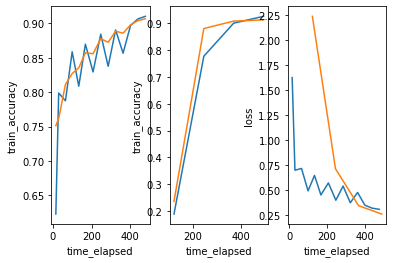

In [19]:
fig, axs = plt.subplots(ncols=3)
sns.lineplot(x="time_elapsed", y="train_accuracy", data=ft_svhn, ax=axs[0])
sns.lineplot(x="time_elapsed", y="test_accuracy", data=ft_svhn, ax=axs[0])
sns.lineplot(x="time_elapsed", y="train_accuracy", data=bp_svhn_, ax=axs[1])
sns.lineplot(x="time_elapsed", y="test_accuracy", data=bp_svhn_, ax=axs[1])
sns.lineplot(x="time_elapsed", y="loss", data=ft_svhn, ax=axs[2])
sns.lineplot(x="time_elapsed", y="loss", data=bp_svhn_, ax=axs[2])

Analysing the CIFAR-100 dataset using a basic net we have built.